<a href="https://colab.research.google.com/github/Archana0002/MCAS3/blob/main/cnn_mnist4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load and Preprocess the MNIST Dataset
# Load the MNIST dataset from Keras
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the data to add a channel dimension (since it's grayscale, 1 channel)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Step 3: Build the CNN Model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output for the fully connected layers
model.add(layers.Flatten())

# Fully connected (Dense) layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 neurons (for 10 classes) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Step 5: Train the Model
history = model.fit(train_images, train_labels, epochs=5,
                    batch_size=64,
                    validation_data=(test_images, test_labels))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 55ms/step - accuracy: 0.8742 - loss: 0.4125 - val_accuracy: 0.9823 - val_loss: 0.0566
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.9832 - loss: 0.0545 - val_accuracy: 0.9857 - val_loss: 0.0445
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.9891 - loss: 0.0358 - val_accuracy: 0.9902 - val_loss: 0.0309
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 55ms/step - accuracy: 0.9921 - loss: 0.0255 - val_accuracy: 0.9884 - val_loss: 0.0335
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9937 - loss: 0.0204 - val_accuracy: 0.9905 - val_loss: 0.0299


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9864 - loss: 0.0395
Test accuracy: 0.9904999732971191


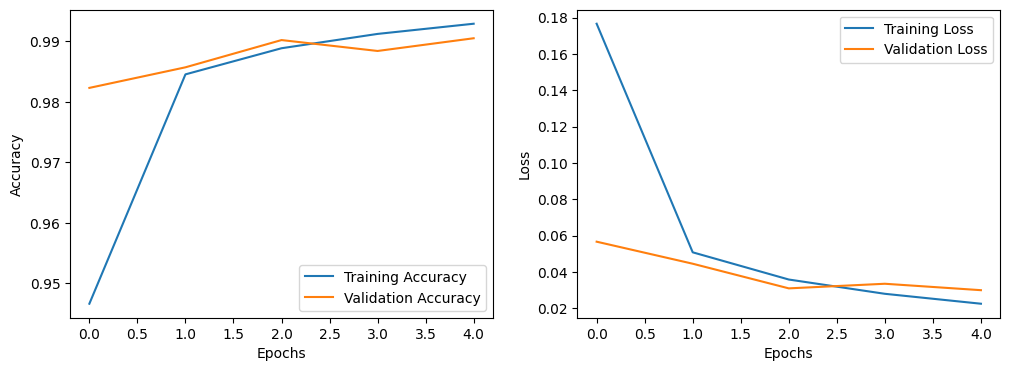

In [6]:
#Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [8]:
# prompt: i need to put unseen data as an image

import numpy as np
from PIL import Image


# Function to preprocess the uploaded image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28
    img_array = np.array(img)
    img_array = img_array.reshape((1, 28, 28, 1))  # Reshape for model input
    img_array = img_array.astype('float32') / 255  # Normalize
    return img_array


from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  # Preprocess the uploaded image
  img_array = preprocess_image(fn)

  # Make a prediction
  prediction = model.predict(img_array)
  predicted_digit = np.argmax(prediction)

  print(f"Predicted digit for {fn}: {predicted_digit}")

Saving one.png to one (2).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted digit for one (2).png: 5
